# Домашнее задание 2 (5 баллов).

*Все задания ниже имеют равный вес (5/10)*

Код для импорта мы написали за вас (не благодарите, нам не трудно). Дальше код будете писать вы. 

[Тут](https://habr.com/ru/companies/ruvds/articles/494720/) шпора по pandas. За основу домашнего задания взят ноутбук [отсюда](https://rutube.ru/video/f884aa6ed5f94120b7304506042fe5bb/) (не подглядывайте!).

In [3]:
import pandas as pd

#### Описание данных

Автор д/з - плохой человек, который не стал переводить описание с мотивировкой, что весь DS на английском. Так что описание полей будет на английском:

1. Account ID
- Description: A unique identifier for each social media account in the dataset.
- Type: Integer
- Example: 1, 2, 3, …
2. Username
- Description: The username or handle of the social media account.
- Type: String
- Example: john_doe, tech_guru_22, fitness_freak
3. Platform
- Description: The social media platform the account is using (Instagram, Twitter, Facebook, TikTok, LinkedIn).
- Type: Categorical (String)
- Example: Instagram, Twitter, Facebook, TikTok, LinkedIn
4. Follower Count
- Description: The total number of followers the account has.
- Type: Integer
- Example: 1500, 245000, 78000
5. Posts Per Week
- Description: The average number of posts the account creates per week.
- Type: Integer
- Example: 3, 5, 7
6. Engagement Rate
- Description: The percentage of interactions (likes, comments, shares) relative to the follower count. This is a measure of how engaging the content is.
- Type: Float
- Range: 0.01 to 0.15
- Example: 0.045 (4.5% engagement rate)
7. Ad Spend (USD)
- Description: The monthly amount spent on advertising or promoting posts.
- Type: Float
- Example: 150.75, 850.00, 300.50
8. Conversion Rate
- Description: The percentage of users who take a desired action (e.g., clicking a link, signing up, etc.) after interacting with an ad.
- Type: Float
- Range: 0.01 to 0.05 (1% to 5% conversion rate)
- Example: 0.025 (2.5% conversion rate)
9. Campaign Reach
- Description: The total number of unique users reached by the user’s campaigns in a given month.
- Type: Integer
- Example: 5000, 20000, 15000

#### Задание 0

Подгрузите данные. Да-да, за чтение таблицы баллов не будет))

**Hint**: [pd.read_csv](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)

In [4]:
# ^⨀ᴥ⨀^
df = pd.read_csv("data.csv")

#### Задание 1

Колонка `Platform` содержит название различных платформ. Давайте представим, что в них есть некоторое отношение порядка. Закодируйте каждую платформу целым числом (от 0 до N) и положите этот "код" в новую колонку `Platform_Code`. Теперь вычислите корреляцию Спирмена между всеми парами колонок в датасете (результатом будет таблица корреляций). В качестве ответа выведите значение корреляции `Platform_Code` с `Engagement Rate`. Можете после вывода числа еще коротко написать, что оно означает (нет, это не оценивается).

**Hint**: [pd.factorize](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html), [pd.DataFrame.select_dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html), [pd.DataFrame.corr](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html).

In [ ]:
# ( ੭ ･ᴗ･ )੭

df['Platform_Code'], _ = pd.factorize(df['Platform'])

correlation_table = df.corr(method='spearman', numeric_only=True)

corr_platform_code_eng_rate = correlation_table.loc['Platform_Code', 'Engagement Rate']

print(corr_platform_code_eng_rate)

0.03138169529349812


Корреляция равна 0.031, что близко к нулю, поэтому зависимость хоть и есть пололжительная, но она очень слабая.

#### Задание 2

Теперь посмотрите на столбец `Follower Count`. В нем какие-то числа. Иногда бывает полезно провести дискретизацию такого признака. Разбейте все значения в столбце на 4 группы: "Low", "Medium", "High", "Very High". Каждая группа включает в себя новые 25% данных. То есть, Low включает в себя 25% самых маленьких значений признака и так далее. Положите значения "Low", "Medium", "High" или "Very High" для каждого сэмпла датасета в новую колонку `Follower_Bin`. Теперь посчитайте среднее значение `Engagement Rate` для каждой категории из `Follower_Bin`. В качестве ответа выведите значение для категории "High".

**Hint**: [pd.qcut](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.qcut.html), [pd.groupby](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html), [pd.DataFrame.mean](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)

In [8]:
# (◕^^◕)

df["Follower_Bin"] = pd.qcut(df['Follower Count'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

mean_engagement_rate_by_follower_bin = df.groupby(by='Follower_Bin', observed=False)['Engagement Rate'].mean()

print(mean_engagement_rate_by_follower_bin['High'])

0.08655032


#### Задание 3

Иногда бывает полезно превратить широкую таблицу в длинную (например, для визуализаций сразу нескольких признаков на одной картинке). Да, звучит странно, но именно этим вы сейчас и займетесь. Сделайте новый датафрейм `melted_df`, в который вы поместите каждый сэмпл датасета 6 раз: по одному разу на значение из 'Follower Count', 'Posts Per Week', 'Ad Spend (USD)', 'Conversion Rate', 'Engagement Rate' и 'Campaign Reach'. То есть, вы берете сэмпл из датасета (строку) и превращаете ее в 6 отдельных строк. Каждая отдельная строка в столбце `Metric` имеет имя из предложенного списка 5 признаков, а в столбце `Value` - значение данного сэмпла по этому признаку. Значение `Platform` повторяется в этих 6 строках.

Иначе говоря, 

```json
{
    "Account ID": 1,
    "Username": "harrislisa",
    "Platform": "TikTok",
    "Follower Count": 54217,
    "Posts Per Week": 3,
    "Engagement Rate": 0.0986,
    "Ad Spend (USD)": 538.1,
    "Conversion Rate": 0.049,
    "Campaign Reach": 1308,
    "Platform_Code": 0,
    "Follower_Bin": "Low"
}
```

превращается в 

```json
{
    "Platform": "TikTok",
    "Metric": "Follower Count",
    "Value": 54217,
},
{
    "Platform": "TikTok",
    "Metric": "Posts Per Week",
    "Value": 3,
}, ...
```

Для каждой уникальной пары значений (`Platform`, `Metric`) посчитайте моду среди всех значений `Value` для этой пары, результат сделайте списком и оставьте только наибольшее. В качестве ответа выведите сумму полученных мод (сумму всех значений в столбце `Value` уже после вычисления мод). Иначе говоря, выведите сумму всех мод значений для всех уникальных пар (`Platform`, `Metric`).

**Hint**: [pd.melt](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html), [pd.DataFrame.mode](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mode.html), [pd.DataFrameGroupBy.agg](https://pandas.pydata.org/docs/dev/reference/api/pandas.core.groupby.DataFrameGroupBy.agg.html)

In [9]:
# (づ๑•ᴗ•๑)づ♡

value_vars = [
    'Follower Count', 
    'Posts Per Week', 
    'Ad Spend (USD)', 
    'Conversion Rate', 
    'Engagement Rate', 
    'Campaign Reach'
]

melted_df = df.melt(id_vars=['Platform'], value_vars=value_vars, var_name='Metric', value_name='Value')

melted_values = melted_df.groupby(['Platform', 'Metric'])['Value']

melted_modes = melted_values.agg(lambda x: x.mode().max())

modes_sum = melted_modes.sum()

print(modes_sum)

3100285.4716


#### Задание 4

А теперь хочется посмотреть на самые популярные аккаунты на разных платформах. Для каждой платформы отсортируйте датафрейм по убыванию количества подписчиков (`Follower Count`) - да, без циклов, сразу для всех платформ сделать сортировку, а затем оставьте только первые три записи для каждой платформы - это и будут три самых популярных аккаунта для каждой платформы. В качестве ответа выведите саму таблицу и минимальное значение `Follower Count` в ней.

**Hint**: к *groupby* можно применять функции - это эквивалентно применению функции к каждой "группе" внутри groupby-объекта. Читайте [про применение apply к датафрейму после groupby](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html#flexible-apply).

In [50]:
# ε(´סּ︵סּ`)з

popular_accounts = df.groupby(by='Platform', observed=False).apply(lambda x: x.nlargest(3, 'Follower Count'))

print(popular_accounts)

print(f"Минимальное значение - {popular_accounts['Follower Count'].min()}")

                Account ID         Username   Platform  Follower Count  \
Platform                                                                 
Facebook  2403        2404           eric65   Facebook          999982   
          7350        7351     patricknoble   Facebook          997915   
          1689        1690      chavezjason   Facebook          997512   
Instagram 8685        8686  alexandersamuel  Instagram          999726   
          3965        3966         lrodgers  Instagram          999351   
          2189        2190           jbrown  Instagram          997844   
LinkedIn  3039        3040          toneill   LinkedIn          999055   
          6359        6360    andrewgregory   LinkedIn          998968   
          2159        2160     ashleycooper   LinkedIn          998925   
TikTok    5838        5839     edwardthomas     TikTok          999739   
          4234        4235    andradewesley     TikTok          999234   
          2575        2576     william

/var/folders/z9/19wy68_x711cm327qjf79_pc0000gn/T/ipykernel_64998/1771550354.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  popular_accounts = df.groupby(by='Platform', observed=False).apply(lambda x: x.nlargest(3, 'Follower Count'))


#### Задание 5

Хочется посчитать какую-то метрику. Мы хотим посмотреть, на отношение разности суммы подписчиков аккаунтов с высокой и низкой конверсией к суммарному охвату рекламы на каждой платформе. То есть, мы делим аккаунты на две группы: высокая и низкая конверсия. Затем мы смотрим на то, на сколько сильно влияние аккаунтов с высокой конверсией по сравнению с аккаунтами с низкой конверсией. 

Давайте определим *Conversion Influence* следущим образом:

$$Conversion Influence = \frac{Total Follower\ Count (High) - Total Follower\ Count (Low)}{Total Campaign Reach (High)+Total Campaign Reach (Low)}$$

Считать эту метрику мы будет для каждой `Platform`. В этой формуле High - это значения всех сэмплов датасета, в которых `Conversion Rate` больше медианы, а `Low` - не более медианы. `Total Feature` - это суммарное количество значений `Feature` либо по `High` сэмплам, либо по `Low`.

Чтобы постоянно не пересчитывать, где High. где Low, сделайте новую колонку в датасете `Conversion_Category`. Положите в нее для каждой строки либо High, либо Low.

Выведите платформу с самым большим `Conversion Influence`.

**Hint**: данное задание не про *groupby*, а скорее про [pd.pivot_table](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). Сделайте сводную таблицу, по которой уже можно посчитать суммы, а затем подставить их в формулы.

In [64]:
# (︶ω︶)

mediana = df['Conversion Rate'].median()

df['Conversion_Category'] = df['Conversion Rate'].apply(lambda x: 'High' if x > mediana else 'Low')

pt = df.pivot_table(values=['Follower Count', 'Campaign Reach'], index='Platform', columns='Conversion_Category', aggfunc='sum')

pt['Conversion Influence'] = (pt['Follower Count', 'High'] - pt['Follower Count', 'Low']) / (pt['Campaign Reach', 'High'] + pt['Campaign Reach', 'Low'])

max_platform_conversion_influence = pt['Conversion Influence'].idxmax()

print(f"Платформа с самым большим Conversion Influence: {max_platform_conversion_influence}")

Платформа с самым большим Conversion Influence: Twitter


#### Задание 6

Мы знаем, что вам понравилось считать метрики по формуле. Давайте закрепим этот успех. Теперь для каждой платформы посчитаем, на сколько эффективна реклама в разрезе трех последовательных записей в датасете. 

Для каждой платформы отсортируйте записи в порядке убывания `Posts Per Week`. Будто бы аккаунты, которые постят чаще, используют более "активные" стратегии по рекламе. Теперь посчитайте *скользущие суммы с окном 3* по `Campaign Reach` и `Ad Spend (USD)`. Скользящая сумма с окном N - это вы идете по массиву, берете все последовательные тройки записей и суммируете их. Для первых двух записей троек не найдется. Для них скользящее среднее - NaN, что нам не помешает. 

Теперь для каждого окна посчитайте 

$$Rolling Efficiency Ratio = \frac{Rolling Sum of Campaign Reach}{Rolling Sum of Ad Spend}$$

По сути, для каждого окна вы посчитаете сколько пользователе привлеклось за один доллар, потреченный на рекламу, в данном окне. Понятно, что значений будет столько, сколько окон. Нам интересно максимальное значение такой эффективности для каждой платформы.

В качестве ответа выведите название платформы с наибольшей максимальной эффективностью и наименьшей (два названия, не одно, не три, ровно два).

**Hint**: окна можно делать через [pd.DataFrame.rolling](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html).

In [82]:
# (◔/‿\◔)

sorted_df = df.sort_values(by=['Platform', 'Posts Per Week'], ascending=[True, False])

sorted_df['Rolling Sum of Campaign Reach'] = sorted_df.groupby(by='Platform')['Campaign Reach'].rolling(window=3, min_periods=3).sum().reset_index(level=0, drop=True)
sorted_df['Rolling Sum of AdSpend'] = sorted_df.groupby(by='Platform')['Ad Spend (USD)'].rolling(window=3, min_periods=3).sum().reset_index(level=0, drop=True)

sorted_df['Rolling Efficiency Ration'] = sorted_df['Rolling Sum of Campaign Reach'] / sorted_df['Rolling Sum of AdSpend']

max_rolling_efficiency_ration = sorted_df.groupby('Platform')['Rolling Efficiency Ration'].max()
min_rolling_efficiency_ration = sorted_df.groupby('Platform')['Rolling Efficiency Ration'].min()

max_platform_rolling_efficiency_ration = max_rolling_efficiency_ration.idxmax()
min_platform_rolling_efficiency_ration = max_rolling_efficiency_ration.idxmin()

print(f"Платформа с наибольшоей максимальной эффективностью: {max_platform_rolling_efficiency_ration}.")
print(f"Платформа с наименьшей максимальной эффективностью: {min_platform_rolling_efficiency_ration}.")

Платформа с наибольшоей максимальной эффективностью: Facebook.
Платформа с наименьшей максимальной эффективностью: TikTok.


#### Задание 7

Это еще не все прекрасные функции pandas, которые мы хотим вам показать. Теперь вы посчитаете, сколько аккаунтов на каждой платформе одновременно лучшие по `Engagement Rate` и `Conversion Rate`.

Сделайте два отдельных суб-сета. В одном оставьте для каждой платфмормы один топовый аккаунт по `Engagement Rate`, в другом - по `Conversion Rate`. Соедините эти два подмножества по столбцу `Platform` так, что в одной строке есть описание сразу двух аккаунтов-лидеров. Теперь посмотрите равны ли имена аккаунтов в одной строке. Выведите количество строк, в которых названия аккаунтов совпадают.

In [90]:
# ( ͡° ͜ʖ ͡°)

top_engagement_rate = df.loc[df.groupby('Platform')['Engagement Rate'].idxmax()]
top_conversion_rate = df.loc[df.groupby('Platform')['Conversion Rate'].idxmax()]

top_engagement_and_conversion_rate = pd.merge(
    top_engagement_rate[['Platform', 'Username']], 
    top_conversion_rate[['Platform', 'Username']], 
    on='Platform',
    suffixes=('_Engagement', '_Conversion')
)

print(top_engagement_and_conversion_rate)

matching_count = (top_engagement_and_conversion_rate['Username_Engagement'] == top_engagement_and_conversion_rate['Username_Conversion']).sum()

print(f"\nКоличество аккаунтов, лидирующих в обеих рейтингах: {matching_count}.")

    Platform Username_Engagement Username_Conversion
0   Facebook             qthomas           michael55
1  Instagram        jaimeedwards       aprilwilliams
2   LinkedIn             allen72              jeff87
3     TikTok          carlosholt        robertmorris
4    Twitter       marquezedward           trobinson

Количество аккаунтов, лидирующих в обеих рейтингах: 0.


#### Задание 8

Давайте теперь что-то попроще сделаем. Например, посчитаем отношение суммарного количества подписчиков на аккаунтах с высокой конверсией к такой же сумме в аккаунтах с низкой конверсией (очевидно, для каждой платформы). По сути, мы просто хотим получить число, которое характеризует, на сколько сильно аккаунты с высокой конверсией "доминируют" над аккаунтами с низкой конверсией в плане количества подписчиков.

Высокой конверсией будем считать конверсию больше средней. Остальное - низкая. Посчитайте суммы подписчиков для каждой платформы, поделите одно на другое и выведите разницу между самым большим значением и самым маленьким, а также платформы, которые соотвутствуют этим значениям.

Используйте магическую команду `%%time`, чтобы замерить, сколько времени ушло на исполнение вашего pandas-скрипта.

In [207]:
# (◡‿◡✿)
%time

# Категории конверсий уже были записаны в столбец 'Conversion_Rate' в задании 5.

pt = df.pivot_table(values='Follower Count', index='Platform', columns='Conversion_Category', aggfunc='sum')
pt['Follower Count Ratio'] = pt['High'] / pt['Low']

max_follower_count_ratio = pt['Follower Count Ratio'].max()
min_follower_count_ratio = pt['Follower Count Ratio'].min()

max_platform_follower_count_ratio = pt['Follower Count Ratio'].idxmax()
min_platform_follower_count_ratio = pt['Follower Count Ratio'].idxmin()

print(pt)

print(f"\nРазница: {max_follower_count_ratio - min_follower_count_ratio}.")

print(f"Наибольшее отношение у {max_platform_follower_count_ratio}: {max_follower_count_ratio}.")
print(f"Наименьшее отношение у {min_platform_follower_count_ratio}: {min_follower_count_ratio}.")

CPU times: user 2 μs, sys: 1 μs, total: 3 μs
Wall time: 7.15 μs
Conversion_Category       High        Low  Follower Count Ratio
Platform                                                       
Facebook             512439819  499712373              1.025470
Instagram            487970573  524726855              0.929952
LinkedIn             509450797  499766430              1.019378
TikTok               495899696  491110679              1.009751
Twitter              536955379  481382949              1.115443

Разница: 0.18549169736245585.
Наибольшее отношение у Twitter: 1.1154432871281446.
Наименьшее отношение у Instagram: 0.9299515897656887.


#### Задание 9

А теперь решите задание 8 чисто питоном. Никаких функций и методов pandas. Только питоновские циклы. Замерьте время выполнения кода. Наконец, сравните время в задании 8 и 9. Напишите ниже, кто же победил: чистый python и pandas?

**Hint**: Чтобы итерироваться по датафрейму, можно из него сделать генератор через [pd.DataFrame.iterrows](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.iterrows.html) или [pd.DataFrame.itertuples](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.itertuples.html#pandas.DataFrame.itertuples). К слову, это не все способы итерироваться по датафрейму.

In [215]:
# (✿◠‿◠)
%time

sums = {}

category_followers_sum = {}

for index, row in df.iterrows():
    platform = row['Platform']
    conversion_category = row['Conversion_Category']
    follower_count = row['Follower Count']

    if platform not in category_followers_sum:
        category_followers_sum[platform] = {'High': 0, 'Low': 0}
    
    category_followers_sum[platform][conversion_category] += follower_count

follower_ratios = {}

for platform, value in category_followers_sum.items():
    ratio = value['High'] / value['Low']
    follower_ratios[platform] = {ratio}

max_platform_follower_count_ratio = max(follower_ratios)
min_platform_follower_count_ratio = min(follower_ratios)
max_follower_count_ratio = follower_ratios[max_platform_follower_count_ratio]
min_follower_count_ratio = follower_ratios[min_platform_follower_count_ratio]

print(f"\nРазница: {max_follower_count_ratio - min_follower_count_ratio}.")

print(f"Наибольшее отношение у {max_platform_follower_count_ratio}: {max_follower_count_ratio}.")
print(f"Наименьшее отношение у {min_platform_follower_count_ratio}: {min_follower_count_ratio}.")

CPU times: user 3 μs, sys: 1 μs, total: 4 μs
Wall time: 5.25 μs

Разница: {1.1154432871281446}.
Наибольшее отношение у Twitter: {1.1154432871281446}.
Наименьшее отношение у Facebook: {1.0254695434567516}.


**А победителем является**: Pandas. 

Pandas в основном выполнял за 3 мкс, а чистый Python - за 4 мкс. Хоть и небольшая разница, но Пандас оказался быстрее.

#### Задание 10

Крайне серьезное задание. Отнеситесь к нему соответствующе. В ячейке ниже напишите ваш любимый анекдот или мем (только без баянов, окей?). Можно плохие. Помните, это задание на полный балл. Проверяющий работу ассистент должен улыбнуться.

Если вставляете картинку, то убедитесь, что вы ее не подгружаете локально. А то будет неудобно - потерять балл на этом задании, когда надо было выложить картинку на облако и прокинуть ссылку. И нет, нельзя сюда просто ссылку вставить. Либо ищите, как вставить картинку, либо смешной анекдот. Есть всего два стула - выбирайте...

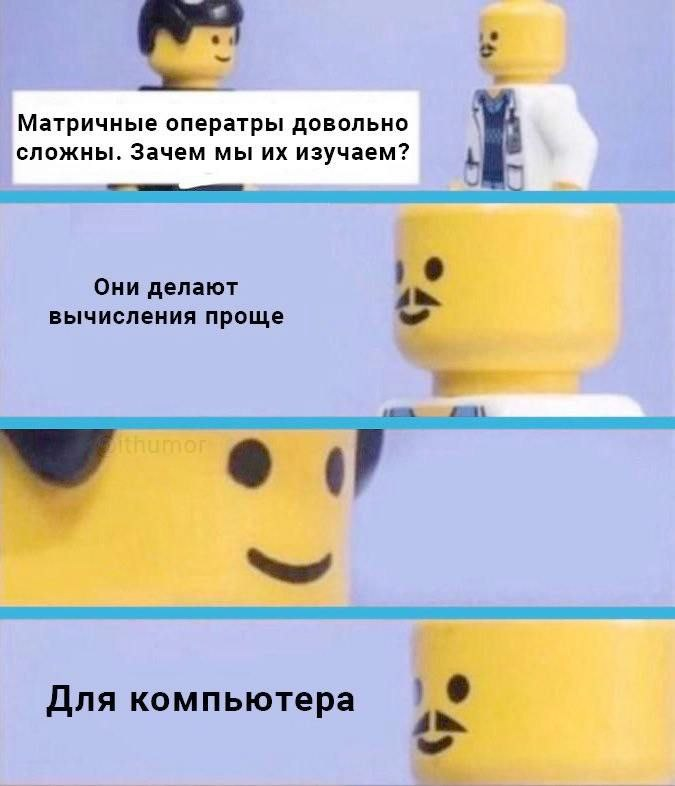

In [10]:
# ‿( ́ ̵ _-`)‿
from IPython.display import Image

Image('meme.jpeg')